In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

from nltk.stem import WordNetLemmatizer 

In [2]:
data_dir = "/Users/brucerowan/Documents/capstone/DigitalDemocracyCapstone/data/training/"
target_col = 'transition_value'

In [3]:
training_output_filename = data_dir  + "training_utterances_binary.csv"


In [4]:
# split dataset evenly based on labels
def split_test_train(total, stratify_col):
    transition_rows = total[total[stratify_col] != 0]
    non_transition_rows = total[total[stratify_col] == 0]
    
    # first split transitions into training/testing
    X_train1, X_test1, y_train1, y_test1 = train_test_split(transition_rows, 
                                                    transition_rows[target_col], 
                                                    test_size=0.30, random_state=42)
    
    # assert there are only transition labels in this dataframe
    assert len(X_train1[X_train1[target_col] == 0]) == 0
    assert len(X_test1[X_test1[target_col] == 0]) == 0
    
    train_len = len(X_train1) # number of non-transitions to add to training set
    test_len = len(X_test1) # number of non-transitions to add to testing set
    print(train_len)
    
    # next split non-transitions into training/testing
    X_train2, X_test2, y_train2, y_test2 = train_test_split(non_transition_rows, 
                                                    non_transition_rows[target_col], 
                                                    test_size=0.30, random_state=42)
    
    # pick train_len random rows from non-transition training set
    ###change n = train_len
   
    X_train2 = X_train2.sample(n = train_len*3, axis=0)
    
    # pick test_len random rows from non_transitions testing set
    X_test2 = X_test2.sample(n = test_len, axis=0)
    
    # assert there are no transition utterances in non-transition training and testing set
    assert len(X_train2[X_train2[target_col] != 0]) == 0
    assert len(X_test2[X_test2[target_col] != 0]) == 0
    
    # final result, concat the dataframe
    X_train_final = pd.concat([X_train1, X_train2])
    X_test_final = pd.concat([X_test1, X_test2])
    return X_train_final['text'], X_test_final['text'], X_train_final[target_col], X_test_final[target_col]
    

In [5]:
data = pd.read_table(training_output_filename, sep = "~")
#pd.set_option('display.max_colwidth', -1)
#data[data[target_col] == 1]['text']
#len(data)
#len(data[data[target_col]]==1)


## testing named entity recognition

In [6]:
text = "Rami Eid is studying at Stony Brook University in New York Civil War"
doc6 = nlp("Rami Eid is studying at Stony Brook University in New York")
for i in range(len(doc6.ents)):
    print(doc6.ents[i],doc6.ents[i].label_)
    if(doc6.ents[i].label_=='PERSON'):
            text =text.replace(doc6.ents[i].text,'PERSON')
    elif(doc6.ents[i].label_ == 'ORG'):
            text =text.replace(doc6.ents[i].text,'ORG')
    elif(doc6.ents[i].label_ == 'GPE'):        
            text =text.replace(doc6.ents[i].text,'GPE')
print(text)

Rami Eid PERSON
Stony Brook University ORG
New York GPE
PERSON is studying at ORG in GPE Civil War


In [7]:
def named_entity(utterance):
    new_utterances = []
    #function takes in a column of text values and returns a new column with text values with named entities
    print(len(utterance))
    count = 0
    for utterance in utterance:
        count= count+1
        print(count)
        text = utterance
        doc = nlp(text)
        #print(text)
        #print(doc.ents)
        for i in range(len(doc.ents)):
            #print(doc.ents[i].label_)
            if(doc.ents[i].label_=='PERSON'):
                    text =text.replace(doc.ents[i].text,'PERSON')
            #elif(doc.ents[i].label_ == 'ORG'):
                    #text =text.replace(doc.ents[i].text,'ORG')
            elif(doc.ents[i].label_ == 'MONEY'):        
                    text =text.replace(doc.ents[i].text,'NUMBER')
            #elif(doc.ents[i].label_ == 'GPE'):        
                    #text =text.replace(doc.ents[i].text,'GPE')
            #elif(doc.ents[i].label_ == 'EVENT'):        
             #       text =text.replace(doc.ents[i].text,'EVENT')
           # elif(doc.ents[i].label_ == 'PRODUCT'):        
            #        text =text.replace(doc.ents[i].text,'PRODUCT')
            elif(doc.ents[i].label_ == 'QUANTITY'):        
                    text =text.replace(doc.ents[i].text,'QUANTITY')
            elif(doc.ents[i].label_ == 'CARDINAL'):        
                    text =text.replace(doc.ents[i].text,'NUMBER')
            elif(doc.ents[i].label_ == 'ORDINAL'):        
                    text =text.replace(doc.ents[i].text,'NUMBER')
            elif(doc.ents[i].label_ == 'DATE'):        
                    text =text.replace(doc.ents[i].text,'DATE')
            elif(doc.ents[i].label_ == 'TIME'):        
                    text =text.replace(doc.ents[i].text,'TIME')
                
        new_utterances.append(text)
        #print(text)            
    return(pd.Series(new_utterances))

## Testing lemma

In [31]:
lemmatizer = WordNetLemmatizer()
text = "cats people bananas mice this is a serious issue, and this bill is we applaud the senator for bringing this bill forward. "
new = [lemmatizer.lemmatize(word, pos='v') for word in text.split(" ")] 
new = [' '.join(new)]
print(new)


['cat people bananas mice this be a serious issue, and this bill be we applaud the senator for bring this bill forward. ']


In [9]:
def lemmatize_utterence(utterences):
    new_utterences = []
    print(len(utterences))
    for utterence in utterences:
        print(utterence)
        new =[lemmatizer.lemmatize(word) for word in utterence.split(' ')]
        new = ' '.join(new)
        new_utterences.append(new)
        print(new)
    return pd.Series(new_utterences)

In [10]:

train = pd.read_table(training_output_filename, sep="~")[['text', target_col]]

In [11]:
train['Entity_text'] = train['text']

In [12]:
#make all 2's into 1's
train.loc[train[target_col] > 0, target_col] = 1
train.columns

Index(['text', 'transition_value', 'Entity_text'], dtype='object')

In [13]:
x_train, x_test, y_train, y_test = split_test_train(train, target_col)

4282


In [14]:
len(x_train)

17128

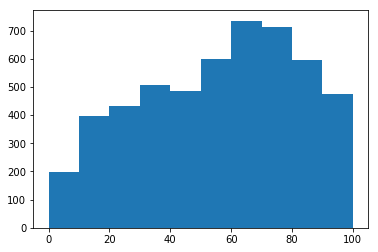

In [15]:
df = train.loc[train[target_col]==1]
lens = (df['text'].apply(len))
plt.hist(lens, range = (0,100))
plt.show()

In [16]:
# there are 5226 transition phrases and 5226*6 = 31356 non transition phrases
# 36582 total

In [17]:
transition_rows = train[train[target_col] != 0]
len(transition_rows)

6118

## Named entity

In [18]:
x_train = named_entity(x_train)

17128
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063


3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704


5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346


6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989


8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635


10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
1023

11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
1161

12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
1298

14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
1435

15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
1572

16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
1709

In [19]:
x_test = named_entity(x_test)

3672
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672


## Lemmatize

In [20]:
x_train = lemmatize_utterence(x_train)

17128
bell?
bell?
this is a serious issue, and this bill is we applaud the senator for bringing this bill forward.
this is a serious issue, and this bill is we applaud the senator for bringing this bill forward.
is anything i included positive that we've done?
is anything i included positive that we've done?
eddie moreno on behalf of the sierra club california.
eddie moreno on behalf of the sierra club california.
now, the commission has taken upon itself the tnc's
now, the commission ha taken upon itself the tnc's
thank you mr. president, senators.
thank you mr. president, senators.
with that, i walked in, actually is a no, just so you know in committee, and i'll be happy to change my vote to a yes.
with that, i walked in, actually is a no, just so you know in committee, and i'll be happy to change my vote to a yes.
...members ...cruelly cooper gomez.
...members ...cruelly cooper gomez.
in la county alone, there is estimated to be NUMBER homeless individuals.
in la county alone, there

my last point would be that there's a lot of comments of the proponents saying that the medicare is the floor.
my last point would be that there's a lot of comment of the proponent saying that the medicare is the floor.
bates, beall, berryhill.
bates, beall, berryhill.
...outstanding contributions that they made
...outstanding contribution that they made
ab DATE by our chairman and it has a due passed recommendation to transportation.
ab DATE by our chairman and it ha a due passed recommendation to transportation.
bring forth another one of the few issues that were being brought up from the opposition
bring forth another one of the few issue that were being brought up from the opposition
mr. secretary, please call the roll.
mr. secretary, please call the roll.
say, well, we could set a sunset of DATE.
say, well, we could set a sunset of DATE.
the connection between arts education and student engagement.
the connection between art education and student engagement.
good TIME and welcome 

the clarification that the puc administrative law judge, judges,
time for that interim hearing.
time for that interim hearing.
thank you madam president and members.
thank you madam president and members.
item NUMBER, ab NUMBER by weber.
item NUMBER, ab NUMBER by weber.
good TIME, and welcome to budget subcommittee
good TIME, and welcome to budget subcommittee
duplicate if ...redundant jobs not only ...not doing about it we're giving raises either ...vote.
duplicate if ...redundant job not only ...not doing about it we're giving raise either ...vote.
i don't want to lose everything that i have so i hope you look at that again, thank you so much.
i don't want to lose everything that i have so i hope you look at that again, thank you so much.
deep condolences and sympathies to the men and women,
deep condolence and sympathy to the men and women,
thank you.
thank you.
let's see if that is on a roll which is good, yeah.
let's see if that is on a roll which is good, yeah.
communities of col

my concern is it does absolutely nothing to address the issues of a swedish tag team for my district.
my concern is it doe absolutely nothing to address the issue of a swedish tag team for my district.
members please come to the floor.
member please come to the floor.
all members vote who desire to vote.
all member vote who desire to vote.
we're going to start with <BILL_ID>
we're going to start with <BILL_ID>
any other questions from members?
any other question from members?
intervention to try to share and treat their addiction, and share with them the dangers of what they're doing.
intervention to try to share and treat their addiction, and share with them the danger of what they're doing.
what normally happens in these deals and the question is, is there an over reach?
what normally happens in these deal and the question is, is there an over reach?
i support the minimum wage increase and everything, but i was curious, does any additional monies
i support the minimum wage increase a

this proposal request an augmentation of NUMBER,
this proposal request an augmentation of NUMBER,
he is practiced and taught acupuncture since DATE.
he is practiced and taught acupuncture since DATE.
an area which used to be rural community but now is much more urban
an area which used to be rural community but now is much more urban
california is only NUMBER of NUMBER states in this great nation that maintain a silo dual licenced child care system.
california is only NUMBER of NUMBER state in this great nation that maintain a silo dual licenced child care system.
ms. brook, you're recognized.
ms. brook, you're recognized.
if people don't buy them, why should we be penalized more?
if people don't buy them, why should we be penalized more?
and at any given time, one of the largest factors here is that the unpredictability of
and at any given time, one of the largest factor here is that the unpredictability of
i urge you to make sure that these are decisions that remain between women and

otherwise, as was mentioned earlier, you could have that case where small counties' homeless count would be so low.
otherwise, a wa mentioned earlier, you could have that case where small counties' homeless count would be so low.
i've been representing families and elders against skilled nursing facilities and residential care facilities for
i've been representing family and elder against skilled nursing facility and residential care facility for
go ahead madam secretary let's have a roll call.
go ahead madam secretary let's have a roll call.
the deposited into a medical marijuana fines and penalties account
the deposited into a medical marijuana fine and penalty account
but we can't make a decision based on emotion.
but we can't make a decision based on emotion.
senator allen.
senator allen.
this proposal is part of the administration's ongoing efforts to change civil service practices.
this proposal is part of the administration's ongoing effort to change civil service practices.
sb 

i also think that there is little doubt that the author has good intentions here.
i also think that there is little doubt that the author ha good intention here.
can make every citizen in a jurisdiction an informed and an active participant in government.
can make every citizen in a jurisdiction an informed and an active participant in government.
local governing board.
local governing board.
childcare centers take ongoing training in recognizing the
childcare center take ongoing training in recognizing the
both the el dorado irrigation district and the desert water agency were able to achieve those targets.
both the el dorado irrigation district and the desert water agency were able to achieve those targets.
the safety item is not designed to calculate penalties associated with failing to meet service quality standards.
the safety item is not designed to calculate penalty associated with failing to meet service quality standards.
all members vote who desire to vote.
all member vote wh

of the law that they're going to be sent information on, they're already complying in the process in which are conducting and
in DATE NUMBER of the hhas offered pediatric medical health services.
in DATE NUMBER of the hhas offered pediatric medical health services.
bates? >> here. >> bates, here.
bates? >> here. >> bates, here.
then we run a foul of the protections that have been designed.
then we run a foul of the protection that have been designed.
been nullified by our international union pending an appeal which is ongoing.
been nullified by our international union pending an appeal which is ongoing.
and this was in specific study of a particular community that has a problem with gun violence.
and this wa in specific study of a particular community that ha a problem with gun violence.
our final subcommittee budget hearing DATE.
our final subcommittee budget hearing DATE.
and that is ab DATE.
and that is ab DATE.
it would allow an expansion of the current submitters.
it would allow a

we are the assembly committee on utility and commerce.
well good TIME everybody, both in the audience and the hall,
well good TIME everybody, both in the audience and the hall,
as a registered agent, a seller or operator is responsible for all aspects of their business,
a a registered agent, a seller or operator is responsible for all aspect of their business,
so NUMBER employees and that will ratchet down to NUMBER employees by DATE, NUMBER.
so NUMBER employee and that will ratchet down to NUMBER employee by DATE, NUMBER.
because of having that additional owners obligation i'll be voting in opposition.
because of having that additional owner obligation i'll be voting in opposition.
to reflect on the significance of the marches on bloody DATE
to reflect on the significance of the march on bloody DATE
not only is this an impact on farmers, but it's an impact on the local tax roles,
not only is this an impact on farmers, but it's an impact on the local tax roles,
we also have included NU

<BILL_ID> senator mcguire come on down.
<BILL_ID> senator mcguire come on down.
<BILL_ID> NUMBER by senator leno, an act relating to health care coverage.
<BILL_ID> NUMBER by senator leno, an act relating to health care coverage.
mcguire, aye.
mcguire, aye.
the current voluntary approach has not been able to attract sufficient participation to make it truly effective.
the current voluntary approach ha not been able to attract sufficient participation to make it truly effective.
talked about homelessness and it talked about seniors who were homeless.
talked about homelessness and it talked about senior who were homeless.
drought with NUMBER to feed and shelter those hardest hit for new
drought with NUMBER to feed and shelter those hardest hit for new
and sometimes they stayed at the hospital where they could use the restrooms for free.
and sometimes they stayed at the hospital where they could use the restroom for free.
file item number NUMBER, sb NUMBER introduced by senators lara and 

and in the back of the chamber i'm joined by NUMBER reverend sing yi min.
senator pan.
senator pan.
we have NUMBER bill DATE, ab NUMBER by assembly member allen.
we have NUMBER bill DATE, ab NUMBER by assembly member allen.
that may be not so onerous but someone who has to use the other choice which is
that may be not so onerous but someone who ha to use the other choice which is
NUMBER split with states getting 60% and regions getting NUMBER%.
NUMBER split with state getting 60% and region getting NUMBER%.
under privileges of the floor will take a moment for this photograph
under privilege of the floor will take a moment for this photograph
interest, it's a common resource that belongs to all californians.
interest, it's a common resource that belongs to all californians.
this is a vote that the amendments are adopted and
this is a vote that the amendment are adopted and
were able to buy the apartment complex to keep them in affordable housing.
were able to buy the apartment complex t

certifying that the course meet uc standard for an a through g course.
[inaudible]
[inaudible]
and local police power, including land use, zoning, privacy,
and local police power, including land use, zoning, privacy,
it does bare repeating after women has been sexually assaulted.
it doe bare repeating after woman ha been sexually assaulted.
furthermore the lack of any transparency or reporting
furthermore the lack of any transparency or reporting
clarifies reporting requirements to the governor and legislature, and
clarifies reporting requirement to the governor and legislature, and
we'd like you to just be able to address that about some of the specifics in regards to the changes in the bill,
we'd like you to just be able to address that about some of the specific in regard to the change in the bill,
taxis, and put them under the umbrella of a regulatory
taxis, and put them under the umbrella of a regulatory
thank you, mr. chairman and members.
thank you, mr. chairman and members.
tha

aye. de leon?
...wrath.
...wrath.
good. you have NUMBER more bill.
good. you have NUMBER more bill.
earned a bachelor's degree.
earned a bachelor's degree.
in DATE commercial sexual exploitation has become a major source of elicit income for
in DATE commercial sexual exploitation ha become a major source of elicit income for
i think this bill could be a pain in the aft.
i think this bill could be a pain in the aft.
thing this mention i notice ...on the ...up on the
thing this mention i notice ...on the ...up on the
stone? >> aye.
stone? >> aye.
should have the principal join in.
should have the principal join in.
senate resolution NUMBER seeks to rectify the mistreatment of men, american men that
senate resolution NUMBER seek to rectify the mistreatment of men, american men that
the mva fund condition.
the mva fund condition.
thank you madame president members here to
thank you madame president member here to
all members vote who desire to vote.
all member vote who desire to vote.
and 

among other things, ab NUMBER line a state's paid sick day law with state law governing [unknown], retired annuities.
the bill is narrowly defined for us and it really does not impact what they do to hold easements,
the bill is narrowly defined for u and it really doe not impact what they do to hold easements,
aye. >> aye, leyva?
aye. >> aye, leyva?
that the state agencies do, without engaging in policy debates which are going on in parallel,
that the state agency do, without engaging in policy debate which are going on in parallel,
we see speech, we see copy all the time that we don't think's appropriate.
we see speech, we see copy all the time that we don't think's appropriate.
aye. >> aye, berryhill.
aye. >> aye, berryhill.
...confirmed file item ...senator DATE and
...confirmed file item ...senator DATE and
california needs a skilled workforce to meet the upcoming demands for projects and not delay.
california need a skilled workforce to meet the upcoming demand for project and not

the development time horizon is DATE unfortunately and NUMBER is short.
hadley, aye.
hadley, aye.
NUMBER applications each fall from prospective students who also are not aware of these policies.
NUMBER application each fall from prospective student who also are not aware of these policies.
aye. >> jackson aye.
aye. >> jackson aye.
aye, berryhill.
aye, berryhill.
start with the consent which also includes ab DATE hour number NUMBER, i move that to consent.
start with the consent which also includes ab DATE hour number NUMBER, i move that to consent.
mendoza? >> aye.
mendoza? >> aye.
the difference is pretty simple.
the difference is pretty simple.
hill.
hill.
the emptiness, disappointment, frustration,
the emptiness, disappointment, frustration,
hungry and sleeping in cars, raped and robbed.
hungry and sleeping in cars, raped and robbed.
gibson?
gibson?
aye.
aye.
behind a man whose life shaped mind was a singularly devoted wife of grace and determination.
behind a man whose life shaped

garcia, aye.
primary care practice compared to DATE of traditional graduates.
primary care practice compared to DATE of traditional graduates.
for purposes of seismic rick's risk mitigation grants.
for purpose of seismic rick's risk mitigation grants.
thank you, madam speaker and members.
thank you, madam speaker and members.
thank you. any opposition?
thank you. any opposition?
the california state auditor's report high risk update, information security.
the california state auditor's report high risk update, information security.
a respectful to one another stay focused on the issues and
a respectful to one another stay focused on the issue and
that will govern the populated area, so i think there's more to come.
that will govern the populated area, so i think there's more to come.
good TIME, chair and members, rebecca long with the metropolitan transportation commission.
good TIME, chair and members, rebecca long with the metropolitan transportation commission.
and, how we actually 

your program most significantly this bill would
your program most significantly this bill would
we've also seen numerous times where federal judge appointments have been,
we've also seen numerous time where federal judge appointment have been,
by stone ...deck ...
by stone ...deck ...
NUMBER of the NUMBER cities that make up the coachella valley along with the unincorporated areas.
NUMBER of the NUMBER city that make up the coachella valley along with the unincorporated areas.
there is discussion, one of the concepts that keeps coming up is something called a differential.
there is discussion, one of the concept that keep coming up is something called a differential.
and for great events planned on the west side of the capital.
and for great event planned on the west side of the capital.
requiring cities to have their own ordinances will also help with the current confusion for
requiring city to have their own ordinance will also help with the current confusion for
seeing and hearing n

that's been pulled back by mister heerwagen, the right to know act, with this to study in his place.
that's been pulled back by mister heerwagen, the right to know act, with this to study in his place.
i mean strychnine is a natural substance, it doesn't mean it's healthy to consume.
i mean strychnine is a natural substance, it doesn't mean it's healthy to consume.
we ask our guests and visitors in the rear of the chamber and
we ask our guest and visitor in the rear of the chamber and
none measure passes file items NUMBER through eighteen pass and
none measure pass file item NUMBER through eighteen pas and
thank you mr. speaker.
thank you mr. speaker.
file item DATE.
file item DATE.
aye. >> jackson, aye.
aye. >> jackson, aye.
aye. >> aye, nielsen?
aye. >> aye, nielsen?
well, it's being held, so it sounds like there's some further time to get some of the answers to the questions.
well, it's being held, so it sound like there's some further time to get some of the answer to the questions

any witnesses in support?
any witness in support?
once we deploy all the body cameras,
once we deploy all the body cameras,
urgency in the bill is needed because the panel's contract is set to expire on DATE,
urgency in the bill is needed because the panel's contract is set to expire on DATE,
child support amounts 45% of income for poor families who receive it.
child support amount 45% of income for poor family who receive it.
leyva?
leyva?
katie andrew from children now, strongly in support.
katie andrew from child now, strongly in support.
nguyen?
nguyen?
as assembly member cooley noted, relatives are also the placements from which we ask the most,
a assembly member cooley noted, relative are also the placement from which we ask the most,
as am i.
a am i.
i would be disappointed if you didn't ask me that question, mr. chair.
i would be disappointed if you didn't ask me that question, mr. chair.
so we're working very hard to come up with something that, i think for the smaller countie

so, i don't see any alternative at this point other than to extend the sunset date as we all of you.
so, i don't see any alternative at this point other than to extend the sunset date a we all of you.
an amendment that guarantees all citizens due process and equal protection under the law.
an amendment that guarantee all citizen due process and equal protection under the law.
ground.
ground.
california has a responsibility to ensure the safety of our citizens and, at the same time,
california ha a responsibility to ensure the safety of our citizen and, at the same time,
mental illness is not a crime.
mental illness is not a crime.
yes, you may respond.
yes, you may respond.
and i'm just curious if we're trying to overturn that section or even by implication or.
and i'm just curious if we're trying to overturn that section or even by implication or.
NUMBER example, is we have a teenager in bakersfield who got NUMBER truancy tickets for missing school.
NUMBER example, is we have a teenag

<BILL_ID>
<BILL_ID>
department of finance?
department of finance?
maintain a list of states to which provisions this bill would apply to.
maintain a list of state to which provision this bill would apply to.
but i just cannot support this without some kind of
but i just cannot support this without some kind of
citizens.
citizens.
the cancellation of DATE of school and for closure of interstate NUMBER for QUANTITY segment.
the cancellation of DATE of school and for closure of interstate NUMBER for QUANTITY segment.
senator roth.
senator roth.
...by leno by labor by loop.
...by leno by labor by loop.
positions on measures did have an oppose [inaudible] amended position outlining
position on measure did have an oppose [inaudible] amended position outlining
but i think that probably will need to be addressed by you, assemblymember, as well.
but i think that probably will need to be addressed by you, assemblymember, a well.
we recommend approving the may revision changes.
we recommend appro

and as senator mcguire pointed out, out of the NUMBER some complaints not NUMBER originated from children in foster care.
and a senator mcguire pointed out, out of the NUMBER some complaint not NUMBER originated from child in foster care.
aye. >> aye. pavley?
aye. >> aye. pavley?
i respectfully ask for an aye vote.
i respectfully ask for an aye vote.
<BILL_ID> is on consent.
<BILL_ID> is on consent.
and they continue to be in the framework.
and they continue to be in the framework.
moving on to sb DATE.
moving on to sb DATE.
i respectfully ask for your aye vote.
i respectfully ask for your aye vote.
made it in your remarks, but we have another bill in the assembly DATE.
made it in your remarks, but we have another bill in the assembly DATE.
the lao's report said that for an increase of NUMBER core members,
the lao's report said that for an increase of NUMBER core members,
no witnesses in opposition?
no witness in opposition?
mr. chair and members, dan dan felizzatto on behalf of the lo

the author is taken some significant amendment that are important.
no, nguyen, nielsen, pan?
no, nguyen, nielsen, pan?
DATE, president of obama launched the young african leaders initiative
DATE, president of obama launched the young african leader initiative
<BILL_ID> pass on file.
<BILL_ID> pas on file.
aye. berryhill?
aye. berryhill?
purposed to be concealed when a parent or somebody who has a proper permit is going on a school campus.
purposed to be concealed when a parent or somebody who ha a proper permit is going on a school campus.
hi. my name is lawanda lesley.
hi. my name is lawanda lesley.
excuse me, proposition NUMBER and the resulting regulations does not provide a clear
excuse me, proposition NUMBER and the resulting regulation doe not provide a clear
aye. >> travis allen, aye.
aye. >> travis allen, aye.
and so the chair's recommending an aye vote.
and so the chair's recommending an aye vote.
members, to bare discussion on this item, to bear discussion, seeing and hearing

we'll ask for them to come back DATE, and we'll consider that going forward.
to allow a shooter to fire a large number of bullets in a short period of time is factually incorrect.
to allow a shooter to fire a large number of bullet in a short period of time is factually incorrect.
which dwell on the issue of district elections.
which dwell on the issue of district elections.
i'm sorry, i beg your pardon.
i'm sorry, i beg your pardon.
in essence of time, i will go ahead and reiterate what staff has put together.
in essence of time, i will go ahead and reiterate what staff ha put together.
however, emts and paramedics do not benefit from the same protections under current law.
however, emts and paramedic do not benefit from the same protection under current law.
as written we fill.
a written we fill.
mr. david chu,
mr. david chu,
in particular is trying to be there for a loved one so members
in particular is trying to be there for a loved one so member
the da, the probation department, t

ab DATE is not the cure all to all of our current housing crisis.
ab DATE is not the cure all to all of our current housing crisis.
our agencies are seeing DATE the numbers of elder abuse and
our agency are seeing DATE the number of elder abuse and
is this a tax or a fee?
is this a tax or a fee?
aye, pan?
aye, pan?
ayes DATE, nos NUMBER.
ayes DATE, no NUMBER.
thank you, madam chair.
thank you, madam chair.
...close ...type ...NUMBER
...close ...type ...NUMBER
<BILL_ID> <BILL_ID> NUMBER, hernandez.
<BILL_ID> <BILL_ID> NUMBER, hernandez.
senator liu.
senator liu.
wolk, aye.
wolk, aye.
thank you.
thank you.
and with the NUMBER that are already at that level specify that they wouldn't lose any current enrollment funding.
and with the NUMBER that are already at that level specify that they wouldn't lose any current enrollment funding.
for the purpose of amendment, the clerk will read with amendments.
for the purpose of amendment, the clerk will read with amendments.
opposed to datasets that

and for us, we see that a an unreasonable delay in payment.
<BILL_ID> NUMBER by senator laura [unknown] into court records.
<BILL_ID> NUMBER by senator laura [unknown] into court records.
[inaudible]
[inaudible]
this is a resolution commemorizing the NUMBER anniversary of
this is a resolution commemorizing the NUMBER anniversary of
travis-allan?
travis-allan?
that have these alternative energies becomes more widespread, they can be price stabilization.
that have these alternative energy becomes more widespread, they can be price stabilization.
aye, mitchell?
aye, mitchell?
by he'll highway so by NUMBER by jackson.
by he'll highway so by NUMBER by jackson.
alejo aye.
alejo aye.
i don't know.
i don't know.
who currently works in government affairs and
who currently work in government affair and
their family, because the information is released and then you're allowed to go through the process.
their family, because the information is released and then you're allowed to go through the pro

is a companion bill i'll present after this is <BILL_ID>
is a companion bill i'll present after this is <BILL_ID>
allen?
allen?
how can we raise benefits regardless of how richly deserved they are?
how can we raise benefit regardless of how richly deserved they are?
i like the sound of that.
i like the sound of that.
thank you, members.
thank you, members.
the larger part of our certified counselors and
the larger part of our certified counselor and
mr. willis was beloved husband of major ofelia alvarez-willis, md,
mr. willis wa beloved husband of major ofelia alvarez-willis, md,
information to actually prepare a stormwater pollution prevention plan.
information to actually prepare a stormwater pollution prevention plan.
secretary, please call the absent members.
secretary, please call the absent members.
the analysis was done by a researcher at ucla.
the analysis wa done by a researcher at ucla.
aye. moorlach?
aye. moorlach?
so what i hear, you're saying and correct me if i'm wrong is

have the money in your pocket to pay for them, to get them, and
thank you, mr. speaker.
thank you, mr. speaker.
<BILL_ID> ab NUMBER.
<BILL_ID> ab NUMBER.
...higher education segments that is the uc system the
...higher education segment that is the uc system the
we definitely would like to sit down to come to some mutual areas of concern, but just DATE we're not there yet.
we definitely would like to sit down to come to some mutual area of concern, but just DATE we're not there yet.
olsen? >> aye.
olsen? >> aye.
thank you. >> thank you.
thank you. >> thank you.
secretary please call the absent members.
secretary please call the absent members.
huff.
huff.
senate amendments were accepted, i respectfully ask for an aye vote.
senate amendment were accepted, i respectfully ask for an aye vote.
ironically enough DATE TIME on my way home there was an uber
ironically enough DATE TIME on my way home there wa an uber
leno? >> aye.
leno? >> aye.
aye. liu. >> aye.
aye. liu. >> aye.
bates.
bates.


members, any debate or discussion?
members, any debate or discussion?
kim?
kim?
the rich nations must use their vast resources of wealth to develop the underdeveloped,
the rich nation must use their vast resource of wealth to develop the underdeveloped,
and others we have not seen any such evidence about the poor or the disabled
and others we have not seen any such evidence about the poor or the disabled
de leon.
de leon.
any other questions?
any other questions?
staffers came to me and
staffer came to me and
again just to reiterate the special expertise portion.
again just to reiterate the special expertise portion.
mendoza?
mendoza?
no, nguyen?
no, nguyen?
mr gatto?
mr gatto?
gordon?
gordon?
and that they have purchasing authority.
and that they have purchasing authority.
counties receive NUMBER of the collected sales and use taxes, and so
county receive NUMBER of the collected sale and use taxes, and so
kim?
kim?
anderson?
anderson?
madam speaker and members.
madam speaker and membe

currently at NUMBER.
plus up program so that the program operate with more efficiency, and
plus up program so that the program operate with more efficiency, and
thank you, mister speaker and members.
thank you, mister speaker and members.
ayes NUMBER, noes NUMBER, the appointments are confirmed.
ayes NUMBER, no NUMBER, the appointment are confirmed.
but this bill is actually going to allow us to do what is actually right for children because there are circumstances.
but this bill is actually going to allow u to do what is actually right for child because there are circumstances.
some of the concerns that we have is in regards to, for example,
some of the concern that we have is in regard to, for example,
finance.
finance.
actually, with your indulgence perhaps i can [unknown] join author.
actually, with your indulgence perhaps i can [unknown] join author.
but we as a legislature suspended the test for
but we a a legislature suspended the test for
but for the treatment or the homes that

yes, madam president.
yes, madam president.
...who desirable.
...who desirable.
aye.
aye.
we don't pay attention to the constitution.
we don't pay attention to the constitution.
i think that many of us would like to vote for the bill, but without that time i don't think, or would it be appropriate for
i think that many of u would like to vote for the bill, but without that time i don't think, or would it be appropriate for
i'm shaun conley with the university of california student association and i'll just echo what they said by adding that
i'm shaun conley with the university of california student association and i'll just echo what they said by adding that
him and thank the family for the great contribution that he
him and thank the family for the great contribution that he
i can't begin to tell you the toll on that and yes as a personal story
i can't begin to tell you the toll on that and yes a a personal story
and, pretended the journal the session schedule is as follows DATE april

for those lawyer in that case, it's the circumstance create the outcome.
which could cause concern by those folks around them that see that activity happening.
which could cause concern by those folk around them that see that activity happening.
and so then your request, mr. chair, to work with just inglewood would not be applicable.
and so then your request, mr. chair, to work with just inglewood would not be applicable.
chu can't into coolly.
chu can't into coolly.
before obtaining their abortion, leading to an increased risk of medical complications.
before obtaining their abortion, leading to an increased risk of medical complications.
aye. >> aye, gaines?
aye. >> aye, gaines?
the appropriation and enabling route legislation are the result of strong collaboration between the administration and
the appropriation and enabling route legislation are the result of strong collaboration between the administration and
the evidence was startling.
the evidence wa startling.
let's say the bla

waldron, aye.
waldron, aye.
please read the roll.
please read the roll.
thank you i would be honored to include you as a coauthor.
thank you i would be honored to include you a a coauthor.
not on this measure, okay, but-
not on this measure, okay, but-
leyva?
leyva?
DATE people die because they're not able to get an organ transplantation.
DATE people die because they're not able to get an organ transplantation.
aye, runner?
aye, runner?
providers i think each and every one of us has had an experience
provider i think each and every one of u ha had an experience
thank you, sir.
thank you, sir.
are there witnesses in support?
are there witness in support?
members, thank you for adjourning in the memory of donna christiansen DATE.
members, thank you for adjourning in the memory of donna christiansen DATE.
student dormitories and requires hybrid sub metering systems.
student dormitory and requires hybrid sub metering systems.
huff?
huff?
quirk aye, santiago?
quirk aye, santiago?
cannella.


please call absent members.
please call absent members.
what's been the concern?
what's been the concern?
i have a committee consultant explain it.
i have a committee consultant explain it.
with that i ask for your right vote.
with that i ask for your right vote.
they're doing a great job now in signing those contracts, and
they're doing a great job now in signing those contracts, and
under current law, there's no prohibition on the attorney general disclosing donor information for
under current law, there's no prohibition on the attorney general disclosing donor information for
aye. >> aye.
aye. >> aye.
ab DATE is an important step to help lyft achieve this vision,
ab DATE is an important step to help lyft achieve this vision,
aye's NUMBER, no's NUMBER.
aye's NUMBER, no's NUMBER.
when we put a sunset on a bill, it's to see if the program works.
when we put a sunset on a bill, it's to see if the program works.
what we're basically telling someone to do, is sign that you agree to someth

thank you mr. chairman, colleagues.
thank you mr. chairman, colleagues.
my name is juan [inaudible] with audubon california and the bill sponsors.
my name is juan [inaudible] with audubon california and the bill sponsors.
the bus stop issue is becoming ever more critical.
the bus stop issue is becoming ever more critical.
we were waiting for mr. allen and hertzberg.
we were waiting for mr. allen and hertzberg.
NUMBER of my clients, the california correctional supervisors,
NUMBER of my clients, the california correctional supervisors,
moorlach.
moorlach.
thank you, let me ask for additional comments, testimony in opposition.
thank you, let me ask for additional comments, testimony in opposition.
in article i, section 3, there is a standard in subsection
in article i, section 3, there is a standard in subsection
but as the senator mentioned, it's entirely discretionary.
but a the senator mentioned, it's entirely discretionary.
sure that's fine, that's fine.
sure that's fine, that's fine.

passed.
DATE, check in session.
DATE, check in session.
under unfinished business, unfinished business, colleagues.
under unfinished business, unfinished business, colleagues.
the governor's proposal was NUMBER to purchase and additional NUMBER fire apparatus, basically, fire trucks.
the governor's proposal wa NUMBER to purchase and additional NUMBER fire apparatus, basically, fire trucks.
we need to fill those positions that's why i'd urge you to back this.
we need to fill those position that's why i'd urge you to back this.
the measure passes.
the measure passes.
please come on up.
please come on up.
[inaudible]
[inaudible]
the debt service would be NUMBER a year.
the debt service would be NUMBER a year.
madam chair, thank you.
madam chair, thank you.
seeing and hearing no further debate, the clerk will open the roll.
seeing and hearing no further debate, the clerk will open the roll.
aye.
aye.
burke, aye.
burke, aye.
great thank you very much.
great thank you very much.
it completel

hearing no objection.
hearing no objection.
it authorizes a state agency to grant a small business relief from a final order of a state agency based on mitigating factors.
it authorizes a state agency to grant a small business relief from a final order of a state agency based on mitigating factors.
and since we've had an opportunity to dive in and through their environmental justice initiatives,
and since we've had an opportunity to dive in and through their environmental justice initiatives,
counties to make use of the housing and disability income advocacy program.
county to make use of the housing and disability income advocacy program.
but i would just urge that in light of the fact we won't be voting and
but i would just urge that in light of the fact we won't be voting and
they turned it over to alameda county.
they turned it over to alameda county.
wolk?
wolk?
mr. speaker, i present to you ab NUMBER for concurrence and senate amendments.
mr. speaker, i present to you ab NUMBER f

there are NUMBER survivor of sexual violence other than rape in california alone.
an oversight by adding the cross-referenced another labor code section this bill would
an oversight by adding the cross-referenced another labor code section this bill would
aye.
aye.
bates?
bates?
all right, thank you so much.
all right, thank you so much.
thank you madame president and members.
thank you madame president and members.
many non-profits do provide, do private fund raising, to provide affordable housing in their communities or
many non-profits do provide, do private fund raising, to provide affordable housing in their community or
and ab DATE cooley.
and ab DATE cooley.
by requiring the california energy commission to develop and
by requiring the california energy commission to develop and
...members vote who desire to vote all members vote desired ...
...members vote who desire to vote all member vote desired ...
metropolis.
metropolis.
wrong, the vacancy did not occur during DATE.
wrong, 

if we could have your attention and
aye.
aye.
needs to be addressed, and i believe that there is a question and
need to be addressed, and i believe that there is a question and
thank you mr. speaker and members.
thank you mr. speaker and members.
that said you can have class action waivers as a part of your arbitration agreement.
that said you can have class action waiver a a part of your arbitration agreement.
so, did you want to adjourn or can i?
so, did you want to adjourn or can i?
within the household, is a key driver and abuse amongst teens.
within the household, is a key driver and abuse amongst teens.
sponsors of the bill, and many of you, as i would agree,
sponsor of the bill, and many of you, a i would agree,
but generally, in this procurement method which is used more and more frequently across the state because it delivers projects quicker.
but generally, in this procurement method which is used more and more frequently across the state because it delivers project quicker.


thank you, mr. speaker, members.
thank you, mr. speaker, members.
...better discussion on the side of the various questions center style.
...better discussion on the side of the various question center style.
again, i say unpaid family care givers.
again, i say unpaid family care givers.
aye. >> aye, pavley?
aye. >> aye, pavley?
thank you. any other members of the public that would like to testify in opposition to the bill?
thank you. any other member of the public that would like to testify in opposition to the bill?
on how these NUMBER?
on how these NUMBER?
in our healthcare workforce development area, we have NUMBER areas of the department focusing in this area,
in our healthcare workforce development area, we have NUMBER area of the department focusing in this area,
and i understand there was some discussion about this in committee as well, and
and i understand there wa some discussion about this in committee a well, and
i would anticipate that there would be significant opportunit

ayes DATE, nos NUMBER on the urgency.
ayes DATE, no NUMBER on the urgency.
to date, drug makers have escaped this openness.
to date, drug maker have escaped this openness.
and i think the caution is, some people think that this combination of
and i think the caution is, some people think that this combination of
p uc reform package which includes my ...NUMBER an
p uc reform package which includes my ...NUMBER an
we took a 10% sample of all california licensed drivers.
we took a 10% sample of all california licensed drivers.
we also, consistent with all the orders, we have not been injecting gas
we also, consistent with all the orders, we have not been injecting gas
and so the NUMBER pages you'll see.
and so the NUMBER page you'll see.
to suspend the rules.
to suspend the rules.
and NUMBER to retrofit and renovate the structure.
and NUMBER to retrofit and renovate the structure.
aye.
aye.
aye. >> aye.
aye. >> aye.
we want to fight along side of these patients to make sure they get acces

senator hancock on the measure i would simply ask for your either any
senator hancock on the measure i would simply ask for your either any
by doing this, by amending california's small dollar loan pilot program, i'm trying to make it easier for
by doing this, by amending california's small dollar loan pilot program, i'm trying to make it easier for
thank you, speakers in support.
thank you, speaker in support.
yes that would be great thank you.
yes that would be great thank you.
after a cal state long beach police stopped him for a broken headlight, and then turned him over to ice.
after a cal state long beach police stopped him for a broken headlight, and then turned him over to ice.
this is not forcing any county or city to create a commission, it just gives them the authority to do so.
this is not forcing any county or city to create a commission, it just give them the authority to do so.
we're going to have to spend some time.
we're going to have to spend some time.
and right now,

NUMBER reading.
ab DATE makes the current distracted driving law more specific to how people are using their phones DATE, in DATE's society.
ab DATE make the current distracted driving law more specific to how people are using their phone DATE, in DATE's society.
the clerk will close the roll.
the clerk will close the roll.
the education committee to hear sb-1457 on DATE,
the education committee to hear sb-1457 on DATE,
we believe that persons who are injured, should be allowed to seek redress however,
we believe that person who are injured, should be allowed to seek redress however,
it is an honor to stand before you here DATE in this chamber that embodies the diversity and
it is an honor to stand before you here DATE in this chamber that embodies the diversity and
aye.
aye.
on DATE, informing them of the returning veterans' right to service credit,
on DATE, informing them of the returning veterans' right to service credit,
fuller. >> mr. secretary, please call the absent members.
ful

the committee analysis references, the lao report from DATE that looked at some
mr sorenson soccer potential and helped launch her career ...
mr sorenson soccer potential and helped launch her career ...
we support the amendments.
we support the amendments.
ms. brown you're recognized.
ms. brown you're recognized.
bill is out to print, and back on file.
bill is out to print, and back on file.
just got TIME apiece, please.
just got TIME apiece, please.
any additional witnesses in support?
any additional witness in support?
we believe this is a common sense measure.
we believe this is a common sense measure.
additionally, sb NUMBER required the department of finance to
additionally, sb NUMBER required the department of finance to
elders over DATE are protected under that particular code section.
elder over DATE are protected under that particular code section.
everything we can to try and address that and make sure that those individuals have a safe place to live.
everything we can to tr

nursing home residents acquire antibiotic resistant infections DATE
nursing home resident acquire antibiotic resistant infection DATE
family-owned businesses are critical for california's economy.
family-owned business are critical for california's economy.
...touring internationally since a DATE performing over NUMBER states
...touring internationally since a DATE performing over NUMBER state
aye.
aye.
i have headaches everyday, and sometimes i would start coughing and cannot stop.
i have headache everyday, and sometimes i would start coughing and cannot stop.
so are there questions for mr. kelly?
so are there question for mr. kelly?
moorlach? >> no.
moorlach? >> no.
and i respectfully ask for this committee's aye vote.
and i respectfully ask for this committee's aye vote.
i haven't had a chance to look at the amendments.
i haven't had a chance to look at the amendments.
however we only had NUMBER students graduate with a computer science degree in DATE.
however we only had NUMBER stu

In [21]:
x_test = lemmatize_utterence(x_test)

3672
okay, we're going to to bring geo to order as a sub committee.
okay, we're going to to bring geo to order a a sub committee.
she could probably beat me.
she could probably beat me.
NUMBER, DATE reduces barriers to injured workers seeking physical and occupational therapy.
NUMBER, DATE reduces barrier to injured worker seeking physical and occupational therapy.
members, we will now take up scr NUMBER hill without reference to file, the clerk will read.
members, we will now take up scr NUMBER hill without reference to file, the clerk will read.
aye. >> aye, block?
aye. >> aye, block?
and pursuant to assembly rule NUMBER, i am re-referring sb NUMBER to the health committee.
and pursuant to assembly rule NUMBER, i am re-referring sb NUMBER to the health committee.
the call on <BILL_ID> sb NUMBER please call the absent members.
the call on <BILL_ID> sb NUMBER please call the absent members.
and it's important that i note this that DATE there are NUMBER children
and it's important that 

yes, it's NUMBER total funds NUMBER general fund in DATE.
yes, it's NUMBER total fund NUMBER general fund in DATE.
aye. >> aye, lara?
aye. >> aye, lara?
hi, i'm mary white.
hi, i'm mary white.
senator hall, welcome to the committee.
senator hall, welcome to the committee.
with the adoption of the urban american river parkway act, it is the 23-mile trail that follows its banks,
with the adoption of the urban american river parkway act, it is the 23-mile trail that follows it banks,
that they have relied upon.
that they have relied upon.
all these things are factors to be considered when it comes to unconscionability as a legal defense.
all these thing are factor to be considered when it come to unconscionability a a legal defense.
and sequester carbon while also providing critical habitat for sensitive species including
and sequester carbon while also providing critical habitat for sensitive specie including
substance abuse disorder counselors who meet specific education,
substance abus

figure speaker and member of ab NUMBER is back for
was in a wheelchair and she had cerebral palsy.
wa in a wheelchair and she had cerebral palsy.
but we have, with the collapse of the now infamous ccms,
but we have, with the collapse of the now infamous ccms,
since it's not our money, it belongs to the local level, what involvement are they.
since it's not our money, it belongs to the local level, what involvement are they.
so we do have NUMBER, it's out, we'll leave the roll open for absent members.
so we do have NUMBER, it's out, we'll leave the roll open for absent members.
the good news here is that this industry is actually self-assessed to fight this bug,
the good news here is that this industry is actually self-assessed to fight this bug,
care system of the future, when we get to the item of ccr.
care system of the future, when we get to the item of ccr.
misidentified english learner students can end up in classrooms or programs that do not address nor
misidentified english lear

so that these are safe, we will also have them strictly handled by expert from the department of justice.
presenting NUMBER bills, sb NUMBER and sb DATE.
presenting NUMBER bills, sb NUMBER and sb DATE.
number real no-win.
number real no-win.
...i am voting no on this bill and i urge you to searcher conferences and vote knows well.
...i am voting no on this bill and i urge you to searcher conference and vote know well.
bell in memorializing the life of officer michael
bell in memorializing the life of officer michael
so it really isn't even related to the $NUMBER an hour, just related to the reality of what it costs to
so it really isn't even related to the $NUMBER an hour, just related to the reality of what it cost to
and we're here on this item and
and we're here on this item and
but cannabis growers in california have starkly been the gross polluters in this state.
but cannabis grower in california have starkly been the gross polluter in this state.
so absent members should get here

madame chair and members, barry burke on behalf of the california academy of audiology, representing the state's licensed audiologists.
madame chair and members, barry burke on behalf of the california academy of audiology, representing the state's licensed audiologists.
fentanyl is NUMBER times more potent than 100% pure heroin.
fentanyl is NUMBER time more potent than 100% pure heroin.
but what this would do is as individuals transfer out and into the community setting,
but what this would do is a individual transfer out and into the community setting,
this lack of research has made it more difficult to objectively assess the public health impact of gun violence and
this lack of research ha made it more difficult to objectively ass the public health impact of gun violence and
thank you, senator gaines.
thank you, senator gaines.
secretary, please call the roll.
secretary, please call the roll.
i would.
i would.
in mccutcheon, the court has also identified the NUMBER legitimate govern

and professional, i'm sorry, the public safety organizations include the california state fire fighters association, who know the dangers of fire fighters.
and professional, i'm sorry, the public safety organization include the california state fire fighter association, who know the danger of fire fighters.
NUMBER, the amendments narrow the proposal, and strike the provisions related to identifying a provider organization and
NUMBER, the amendment narrow the proposal, and strike the provision related to identifying a provider organization and
thank you, ms. gonzalez.
thank you, ms. gonzalez.
channel the theory chapel is one of california's oldest historical buildings
channel the theory chapel is one of california's oldest historical building
has an attendance policy that prohibits the child from attending or
ha an attendance policy that prohibits the child from attending or
i do however have a concern as i know a lot of people do that this action would negatively affect the energy stab

that we can really benefit everyone in our society from this.
that we can really benefit everyone in our society from this.
but it is important, and i'll share with you why.
but it is important, and i'll share with you why.
...just add a few more to what he has stated ... asian and pacific
...just add a few more to what he ha stated ... asian and pacific
it provides a very modest DATE increase of $NUMBER per month.
it provides a very modest DATE increase of $NUMBER per month.
eggman at TIME DATE, DATE in room DATE.
eggman at TIME DATE, DATE in room DATE.
in DATE, sb DATE was chaptered and it reduced the DATE cal grant awards for
in DATE, sb DATE wa chaptered and it reduced the DATE cal grant award for
the [unknown] part was incorrect, correct me on that in your comments please.
the [unknown] part wa incorrect, correct me on that in your comment please.
signs of child abuse and how to report it childcare providers
sign of child abuse and how to report it childcare provider
will be able 

in DATE's san jose mercury news, they indicated that the average home in san mateo county,
in DATE's san jose mercury news, they indicated that the average home in san mateo county,
of comprehensive national list of those missing to effectively deal with
of comprehensive national list of those missing to effectively deal with
baker, no.
baker, no.
issue and we must do everything we can to help part-time faculty.
issue and we must do everything we can to help part-time faculty.
people within our borders, this resolution is relevant now DATE more than ever.
people within our borders, this resolution is relevant now DATE more than ever.
for those reasons, we definitely support this, because it allows us to basically continue to function in a way that's more efficient.
for those reasons, we definitely support this, because it allows u to basically continue to function in a way that's more efficient.
NUMBER of the things that we are really concerned about
NUMBER of the thing that we are rea

asbestos and heavy metal, including lead and polychlorinated biphenyls-
these actions further reduce the ongoing reductions that need to be addressed by the trial courts.
these action further reduce the ongoing reduction that need to be addressed by the trial courts.
anya lawler with western center on law and poverty in support.
anya lawler with western center on law and poverty in support.
[inaudible]
[inaudible]
pilot counties upon implementation of
pilot county upon implementation of
runner.
runner.
this would continue, regardless of state's changes in laws.
this would continue, regardless of state's change in laws.
aye, huff?
aye, huff?
...were still there it can't be done it's going to kill jobs.
...were still there it can't be done it's going to kill jobs.
in other words, if you go to this location to receive your care,
in other words, if you go to this location to receive your care,
we'll continue to work on that but thank you for pointing that out.
we'll continue to work on tha

we don't think that lag is really happening, but we haven't seen their data, the franchise tax board data on that.
we don't think that lag is really happening, but we haven't seen their data, the franchise tax board data on that.
we've talked DATE, certainly, about access to health care.
we've talked DATE, certainly, about access to health care.
melendez aye.
melendez aye.
a salary of NUMBER a year, or $NUMBER per day.
a salary of NUMBER a year, or $NUMBER per day.
lara?
lara?
ironically again with mark rosenberg, who is the former director of cdc's national center for
ironically again with mark rosenberg, who is the former director of cdc's national center for
is that congress give them the opportunity to serve their country in the armed forces.
is that congress give them the opportunity to serve their country in the armed forces.
dealing with somebody who's passed away and you're trying to figure out how to manage the assets.
dealing with somebody who's passed away and you're trying 

this is an issue that is going to impact us in ways that
this is an issue that is going to impact u in way that
counting with of lesser population is now competing against san francisco or santa clara.
counting with of lesser population is now competing against san francisco or santa clara.
by publicly confirming california's strong support of a woman's right to make her own reproductive
by publicly confirming california's strong support of a woman's right to make her own reproductive
nielsen aye.
nielsen aye.
...covered in this bill on medicare fee schedule
...covered in this bill on medicare fee schedule
when you look and read, if you look at the analysis, at the minor procedures that would be included.
when you look and read, if you look at the analysis, at the minor procedure that would be included.
it would also provide NUMBER of underserved californians with quality supervised probono representation and
it would also provide NUMBER of underserved californian with quality supervis

In [22]:
x_test = pd.Series(x_test)
x_train = pd.Series(x_train)

In [23]:
#for i in range(len(x_train)):
 #   x_train[i] = x_train[i][0]
    

In [24]:
#for i in range(len(x_test)):
#    x_test[i] = x_test[i][0]
#    

### Assert training and testing splits are the correct dimensions
### After splitting, training and testing sets should each have 50% transitions and 50% non-transitions
### training dimensions should be 2 * 70% of the number of transitions in the data set
### testing dimensions should be 2 * 30% of the number of transitions in the data set

In [25]:
len(train)

656444

In [26]:
assert len(x_train) == len(y_train)

In [27]:
assert len(x_test) == len(y_test)

In [28]:
assert len(x_train) == int(len(transition_rows) * 0.7) * 2

AssertionError: 

In [32]:
assert len(x_test) == (len(transition_rows) * 2) - (int(len(transition_rows) * 0.7) * 2)

In [33]:
assert len(y_train[y_train == 0]) == len(y_train[y_train != 0])

AssertionError: 

In [34]:
assert len(y_test[y_test == 0]) == len(y_test[y_test != 0])

### Vectorize utterances with bag of words features

In [35]:
count_vect = CountVectorizer()
count_vect.fit(np.hstack((x_train, x_test)))
X_train_counts = count_vect.transform(x_train)
X_test_counts = count_vect.transform(x_test)

In [36]:
assert X_train_counts.shape[1] == X_test_counts.shape[1]

### Pass vectorized utterances into a Naive Bayes model

In [37]:
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Output accuracy on testing set

In [38]:
assert X_test_counts.shape[0] == y_test.shape[0]

In [39]:
clf.score(X_test_counts, y_test, sample_weight=None)

0.5187908496732027

In [40]:
nb_predictions =clf.predict(X_test_counts)
nb_predictions

array([1, 0, 1, ..., 0, 0, 0])

In [41]:
wrong = 0
missed_transition = 0
for i in range(len(nb_predictions)):
    if nb_predictions[i] != y_test.iloc[i]:
        wrong= wrong+1
        print(nb_predictions[i],y_test.iloc[i],x_test.iloc[i])
        if nb_predictions[i] == 0:
            missed_transition = missed_transition +1 

0 1 she could probably beat me.
0 1 members, we will now take up scr NUMBER hill without reference to file, the clerk will read.
0 1 aye. >> aye, block?
0 1 and pursuant to assembly rule NUMBER, i am re-referring sb NUMBER to the health committee.
0 1 the call on <BILL_ID> sb NUMBER please call the absent members.
0 1 and it's important that i note this that DATE there are NUMBER child
0 1 thank you very much madam chair and members.
0 1 that's that's a really important component in doing this.
0 1 this committee to order.
0 1 item NUMBER, sb NUMBER by runner.
0 1 were either born in or spent DATE in these camp during world war ii and shortly after world war ii.
0 1 i'm here on behalf of the california correctional supervisor organization.
0 1 aye. >> aye, de leon, fuller.
0 1 deputy pullman caught up with him and in the ensuing struggle he wa shot and died at the scene.
0 1 so that the increase are large by percentage, but DATE have gone by without any increase.
0 1 we also think that

0 1 and we appreciate the senator's leadership to bring it before you DATE.
0 1 seeing and hearing no further debate, the clerk will open the role.
0 1 but at the core, this is an issue that relates to the high cost of teacher retention, the high cost of teacher recruitment.
0 1 mr. sayed de hini is the founder of the young vision music foundation,
0 1 and this is an opportunity, especially with passage of the mco tax,
0 1 this bill will ensure that counsel representing the child or non-minor dependent will not have a caseload that exceeds NUMBER clients,
0 1 and we will be working with caltrans to respond to the comment that are submitted
0 1 ...sand on campus
0 1 every entity need to be held accountable to support the client that come through their door.
0 1 aye. jackson?
0 1 the scientist are ...i've worked with them and i know what they do
0 1 moving briefly back to guest introductions.
0 1 and there are many people in the latino community that have contributed,
0 1 mr. secretary, 

0 1 i previously coordinated elk grove's early mental health initiative program,
0 1 mr. salas, you too are recognized.
0 1 good TIME mr. chair and members.
0 1 california's housing cost are the highest in the nation and rapidly increasing.
0 1 jewish american heritage month and this individual,
0 1 that's why my back is all cramped up, because.
0 1 all member vote who desire to vote.
0 1 california should proactively procure and manage these asset
0 1 [inaudible] and reviewing.
0 1 i appreciate the goal of this a well a ms. olsen's comment there.
0 1 i'm sad to say, i'm disappointed to say, that the board of state and community corrections,
0 1 a lot of u to eat the food that we eat and to go into building that are clean.
0 1 the legislature would have to pas another bill to pitch it on a future ballot.
0 1 but we're trying to make sure that we're setting a standard here and saying that
0 1 all right, that ha been moved.
0 1 that's <BILL_ID> NUMBER.
0 1 it's going to leave operator at

0 1 seen in hearing no further debate on this magnificent bill the click ...
0 1 file item DATE.
0 1 they are victims.
0 1 and if this is the type of thing that we can do, and to support, i'll be more than happy to do it.
0 1 <BILL_ID> DATE by assemblymember bigelow and others, an act relating to public contracts.
0 1 what we call 2567s in DATE of DATE.
0 1 foreign national living inside the united state should not be able to contribute to these kind of things.
0 1 DATE cooley, welcome.
0 1 we believe that having a staff that is culturally proficient and
0 1 so this measure will be very helpful and allow u to serve those deserving child and families.
0 1 that it will create an incentive for the quality of the information to improve.
0 1 we have fought to put an advisory committee together in our neighborhood to ensure that there wa pressure on state agency to act.
0 1 we do have some continuing concerns, but we do have to acknowledge the author's effort to talk to us,
0 1 i'm a DATE ve

1 0 modeled after aba accreditation, and comparable to that of regional accreditors like wasc.


In [42]:
print(wrong)
print(missed_transition/wrong)

1767
0.8856819468024901


## keras

In [50]:
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout, Activation, Bidirectional
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

## tokenize words

In [44]:
tokenizer = Tokenizer(num_words=40000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [45]:
#so all utterences are same length
padded = pad_sequences(sequences, maxlen = 44)
print(padded.shape)

(17128, 44)


In [46]:
pred = to_categorical(y_train)
pred


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [87]:
model = Sequential()
model.add(Embedding(40000, 150, input_length=44))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(25,activation = 'sigmoid'))
model.add(Dense(2, activation='sigmoid')) #fully connected layer
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



In [88]:
#class weights 
class_weight = {
    0 : 1.,
    1: 3.,
    }

Train on 10276 samples, validate on 6852 samples
Epoch 1/3
10276/10276 [==============================] - 50s 5ms/step - loss: 1.1183 - acc: 0.4553 - val_loss: 1.1152 - val_acc: 0.2614
Epoch 2/3
10276/10276 [==============================] - 43s 4ms/step - loss: 1.0565 - acc: 0.5377 - val_loss: 0.9574 - val_acc: 0.3280
Epoch 3/3
10276/10276 [==============================] - 43s 4ms/step - loss: 0.9687 - acc: 0.6295 - val_loss: 0.9985 - val_acc: 0.3938
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


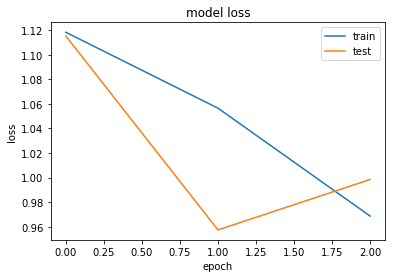

In [89]:
history =model.fit(padded, pred,validation_split=0.4, epochs = 3,class_weight = class_weight)



# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## testing 


In [90]:
tokenizer.fit_on_texts(x_test)
sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(sequences, maxlen = 44)
print(test_padded.shape)

(3672, 44)


In [91]:
predictions = model.predict(test_padded)
predictions = np.argmax(predictions, axis =1)
print(len(predictions))

3672


In [92]:
accuracy_score(predictions,y_test)


0.559368191721133

In [93]:
#print(x_test.head(100))


In [94]:
wrong = 0
missed_transition = 0
for i in range(len(predictions)):
    if predictions[i] != y_test.iloc[i]:
        wrong= wrong+1
        print(predictions[i],y_test.iloc[i],x_test.iloc[i])
        if predictions[i] == 0:
            missed_transition = missed_transition +1 

0 1 NUMBER, DATE reduces barrier to injured worker seeking physical and occupational therapy.
0 1 members, we will now take up scr NUMBER hill without reference to file, the clerk will read.
0 1 aye. >> aye, block?
0 1 that's that's a really important component in doing this.
0 1 this committee to order.
0 1 item NUMBER, sb NUMBER by runner.
0 1 aye. >> aye, de leon, fuller.
0 1 the ...one it know NUMBER.
0 1 aye, lara.
0 1 there he is.
0 1 good TIME madam chair and member of the committee.
0 1 a role.
0 1 thank you.
0 1 aye. hill? aye.
0 1 think
0 1 so their program can continue on a it ha since it inception.
0 1 cost barrier related to pipeline interconnection and injection and lack of long-term contracts.
0 1 NUMBER.
0 1 okay, very good.
0 1 all member vote who desire to vote.
0 1 this hearing of the senate committee on public employment retirement.
0 1 yeah, the bill get NUMBER votes, it's successfully out.
0 1 the time of station which with a
0 1 and ...those who follow u ...every

1 0 so long a they adhere to strict federal cyber security guideline that were added to the bill in the assembly privacy committee.
1 0 in fact, they specifically left out conveyance altogether.
1 0 thank you mr. cooley, seeing no discussion on this item, clerk will open the roll.
1 0 co-authors adding on the resolution.
1 0 it wa originally suggested to me by a social study
1 0 well, a i mentioned earlier, the review and the action's up held because the state supervision
1 0 that is item in a roll call.
1 0 i'm supporting ab DATE.
1 0 go ahead patricia.
1 0 the united state supreme court agreed with our colleague, mr. leno.
1 0 this bill authorizes and extends, design build authority for
1 0 thank you ms. beiner[sp?].
1 0 precedent of law that ha been built up around code section 583 and the public utility code.
1 0 it ha been used with an agreement between the county and
1 0 madam chair i share you concern about funding and i'm sure that's an issue that a probst-
1 0 yeah there are a

1 0 i don't think there's any debate about that.
1 0 and that shared responsibility is where we get into some grey areas.
1 0 and that includes all stakeholders, the consumer groups, the health plans, everyone to address the remaining concern in this bill.
1 0 senator very he'll do thank you madam president and then members,
1 0 i also want to take a moment to congratulate cathleen.
1 0 so thank you for bringing this bill up.
1 0 they are not regulated or licensed by any u government entity.
1 0 myself down-to-earth and would like to add to engage
1 0 generally that's our concern, right, that we're trying to be mindful of taxpayer dollar.
1 0 levine?
1 0 this distinguished group is visiting our state capitol a part of a study tour
1 0 <BILL_ID> NUMBER by senator hernandez, an act relating to healthcare coverage.
1 0 ...all community guidance to your path.
1 0 NUMBER and something NUMBER i NUMBER.
1 0 and would ask again for an aye vote at the appropriate time.
1 0 bringing this bill be

In [75]:
print(wrong)
print(missed_transition)
print(missed_transition/wrong)


1866
652
0.34941050375133975


## Notes
3 epochs seems to be the sweet spot

(using 6 times more non transitions)

model 1: 1 epochs, adam optimzer, class weights(0:1,1:6)
accuracy score: 58.06%, (61% guessed 0 when correct was 1)

model 1: 4 epochs, adam optimzer, class weights(0:1,1:6)
accuracy score: 53.46%, (72% guessed 0 when correct was 1)

model 1: 10 epochs, adam optimzer, class weights (0:1,1:6)
accuracy score: 53.31%, (61% guessed 0 when correct was 1)

model 1: 15 epochs, adam optimzer, class weights (0:1,1:6)
accuracy score: 53.15%, (71% guessed 0 when correct was 1)

model 1: 20 epochs, adam optimzer, class weights (0:1,1:6)
accuracy score: 51.36%, (69% guessed 0 when correct was 1)

model 1: 25 epochs, adam optimzer, class weights (0:1,1:6)
accuracy score: 52.83%, (67% guessed 0 when correct was 1)

model 1: 30 epochs, adam optimzer, class weights (0:1,1:6)
accuracy score: 51.65%, (73% guessed 0 when correct was 1)

model 1: 1 epochs, rmsprop, class weights (0:1,1:6)
accuracy score: 45.5%, (74% guessed 0 when correct was 1)

###model 2 

1 epoch, adam
accuracy score: 51.4%, (67.8% guessed 0 when correct was 1)

4 epochs, adam
accuracy score: 52.0%, (71.8% guessed 0 when correct was 1


### model1 
model = Sequential()
model.add(Embedding(20000, 150, input_length=44))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.5))
model.add(Dense(2, activation='sigmoid')) #fully connected layer
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


### model2 (remove conv layer and pooling layer)
model = Sequential()
model.add(Embedding(20000, 150, input_length=44))

model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.5))
model.add(Dense(2, activation='sigmoid')) #fully connected layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



## model 3(model 1 with another dense layer) 59% acc on n_range data
model = Sequential()
model.add(Embedding(20000, 150, input_length=44))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.5))
model.add(Dense(25,activation = 'sigmoid'))
model.add(Dense(2, activation='sigmoid')) #fully connected layer
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
